# Predicting PewDiePie's Subscribers (Linear Regression)
*Author: Alex Scott*

Here I am following along with Tanu Nanda Prabhu's example, which can be found at https://github.com/Tanu-N-Prabhu/Python/blob/master/Predicting_PewDiePie's_daily_subscribers_using_Machine_Learning_.ipynb

In [124]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [8]:
df = pd.read_csv('PewDiePie.csv')
print(df.info())
print(df.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Date         20 non-null     int64
 1   Subscribers  20 non-null     int64
dtypes: int64(2)
memory usage: 448.0 bytes
None
   Date  Subscribers
0     1        71915
1     2        48270
2     3        47746
3     4        42276
4     5        36867
5     6        28722
6     7        29794
7     8        33125
8     9        27877
9    10        30675


where Subscribers = daily increase. The data comes from May 2019, where 
    
    1 = May 1, 
    
    2 = May 2, 
    
    and so on.

In [41]:
#split the dataset into feature and target matrix
x = df.iloc[:,:-1]
y = df.iloc[:, 1]
print(x[:5])
print(y[:5])

   Date
0     1
1     2
2     3
3     4
4     5
0    71915
1    48270
2    47746
3    42276
4    36867
Name: Subscribers, dtype: int64


In [42]:
#train test split; arbitrary test size of 0.3 (30%)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

In [43]:
#implement simple linear regression

lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
predicted = pd.DataFrame(y_pred)

#from sklearn.metrics import accuracy_score

predicted.apply(np.round)

,0
0,31042.0
1,47086.0
2,30098.0
3,40480.0
4,38592.0
5,31985.0


In [56]:
#next day is May 21; how many subscribers will be gained by the end of the month?
i = 21
total = 0
while i <= 31:
    print("Increase in subscribers on May %d:\n" %(i) , int(lr.predict([[i]])))
    i += 1
    total += int(lr.predict([[i]]))

print("Total gain in subscribers through the \nend of May: ", total)

Increase in subscribers on May 21:
 29154
Increase in subscribers on May 22:
 28210
Increase in subscribers on May 23:
 27266
Increase in subscribers on May 24:
 26322
Increase in subscribers on May 25:
 25378
Increase in subscribers on May 26:
 24434
Increase in subscribers on May 27:
 23491
Increase in subscribers on May 28:
 22547
Increase in subscribers on May 29:
 21603
Increase in subscribers on May 30:
 20659
Increase in subscribers on May 31:
 19715
Total gain in subscribers through the 
end of May:  258397


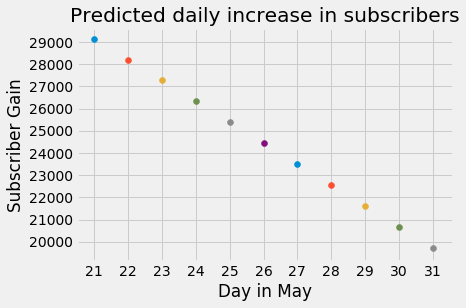

In [135]:
#plotting the predicted daily increase in subscribers
plt.style.use("fivethirtyeight")
fig = plt.figure()
ax = plt.axes()

i=21
while i <=31:
    ax.scatter(i, lr.predict([[i]]))
    i += 1
ax.set_title("Predicted daily increase in subscribers")
ax.set_xlabel("Day in May")
ax.set_ylabel("Subscriber Gain")

ax.set_xticks(np.arange(21, 32, step = 1));
ax.set_yticks(np.arange(20000, 30000, step = 1000));

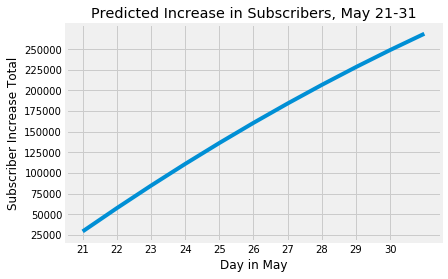

In [134]:
#plot the increase between the 21st and 31st
fig = plt.figure()
ax = plt.axes()

days = np.arange(21, 32, step=1)
days = pd.DataFrame(days)
days['total'] = "place"
days.columns = ['Date','Total']

i = 21
total = 0
while i <= 31:
    days["Total"][i-21] = total + int(lr.predict([[i]]))
    total = total + int(lr.predict([[i]]))
    i += 1

ax.plot(days["Date"], days["Total"])
ax.set_title("Predicted Increase in Subscribers, May 21-31")
ax.set_xlabel("Day in May")
ax.set_ylabel("Subscriber Increase Total")
ax.set_xticks(np.arange(21, 31, step = 1));
ax.set_yticks(np.arange(25000, 275000, step = 25000));

PewDiePie's new subscriber rate was decreasing in May, 2019.